In [2]:
!mkdir -p ~/dv/imaging/iMars3D/tests/autorecon/huggies/
%cd ~/dv/imaging/iMars3D/tests/autorecon/huggies/

/SNS/users/lj7/dv/imaging/iMars3D/tests/autorecon/huggies


In [3]:
reddir = '/SNSlocal2/__autoreduce.CT-group-2495//'

In [4]:
import os, glob, numpy as np
from imars3d import io
%matplotlib notebook

In [5]:
import matplotlib as mpl
plt = mpl.pyplot

In [6]:
ls {reddir}/

crop/               intensity-fluctuation-correction/  sinogram/
CT_frame_averaged/  median_filtered/                   tilt-correction-0/
find-rot-center/    normalization/                     tomopy-findcenter/
gamma-filter/       rot_center


tilt?

In [23]:
# ls {reddir}/intensity-fluctuation-correction

<IPython.core.display.Javascript object>


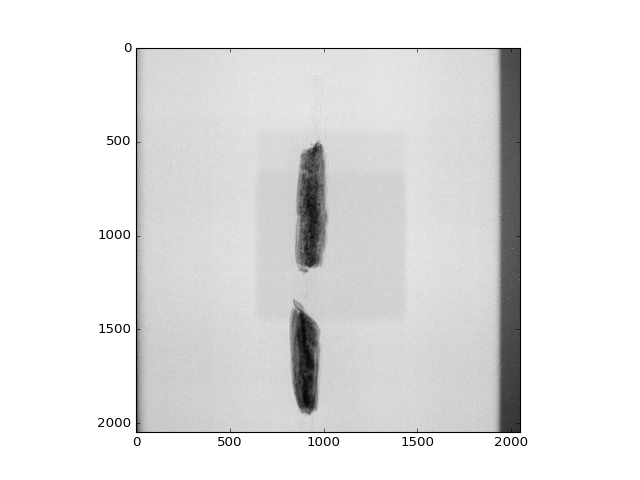

In [21]:
t0 = io.ImageFile(os.path.join(reddir, 'intensity-fluctuation-correction/intfluctcorrected_000_000.tiff')).data
plt.figure()
plt.imshow(t0, cmap='gray')

<IPython.core.display.Javascript object>


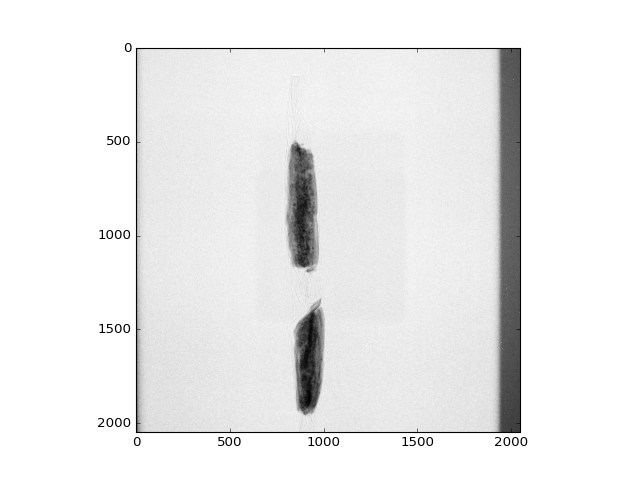

In [22]:
t180 = io.ImageFile(os.path.join(reddir, 'intensity-fluctuation-correction/intfluctcorrected_179_955.tiff')).data
plt.figure()
plt.imshow(t180, cmap='gray')

In [19]:
flp = np.fliplr(t180)

In [20]:
def shift_diff(x, img1, img2):
    # shift positive means img2 was shifted to the left,
    # or img1 was shifted to the right.
    x = int(x)
    if x>0:
        left = img1[:, :-x]
        right = img2[:, x:]
    elif x<0:
        left = img1[:, -x:]
        right = img2[:, :x]
    else:
        left = img1
        right = img2
    return left-right

<IPython.core.display.Javascript object>


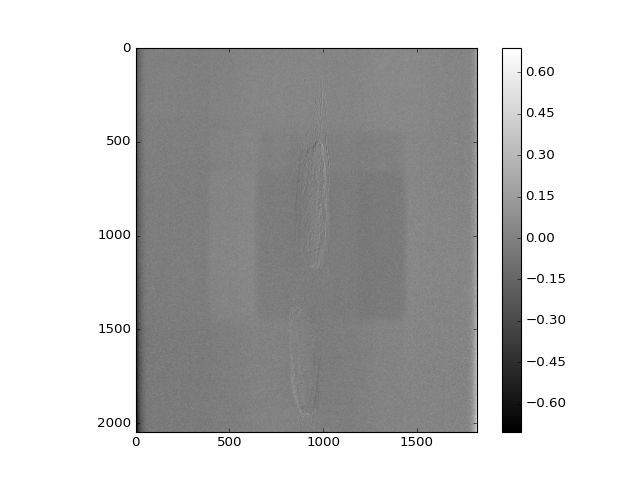

In [34]:
d = shift_diff(228, t0, flp)

plt.figure()
plt.imshow(d, cmap='gray')
plt.colorbar()